In [3]:
# importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
import seaborn as sns
from pandas.io.sas.sas7bdat import _column
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

pd.set_option('display.max_rows',99999999)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width',None)

def plot_insight(categorical_col_name):
    third_time = attending_3rd_time[categorical_col_name].value_counts()
    first_time = attending_1st_time[categorical_col_name].value_counts()
    third_time = pd.DataFrame(third_time)
    third_time = third_time.rename(columns = {categorical_col_name:'Count'})
    third_time.index.names = [categorical_col_name]


    first_time = pd.DataFrame(first_time)
    first_time = first_time.rename(columns = {categorical_col_name:'Count'})
    first_time.index.names = [categorical_col_name]

    p1 = figure(x_range = list(first_time.index),plot_width=400, plot_height=300,
           background_fill_color = "honeydew", border_fill_color = 'honeydew')
    p2 = figure(x_range = list(third_time.index),plot_width=400, plot_height=300,
           background_fill_color = "honeydew", border_fill_color = 'honeydew')

    f1 = p1.vbar(x=list(first_time.index), bottom=0,width = 0.3,
       top=list(first_time.Count), color="limegreen")

    f2 = p2.vbar(x=list(third_time.index), bottom=0,width = 0.3,
       top=list(third_time.Count), color="mediumslateblue")
    
    legend = Legend(items=[("Visiting first time",[f1])], location=(0, -30))
    legend_1 = Legend(items=[("Visiting third time" ,[f2])], location=(0, -30))
    
    p1.add_layout(legend, 'right')
    p2.add_layout(legend_1, 'right')
    show(p1)
    show(p2)

Loading BokehJS ...

Cleaning the data. Removing the first two columns because they are blank and contains index and timestamp, which are not required for the analysis

In [4]:

df = pd.read_excel("SUDS.xlsx")

col = df.columns[0]

df.drop(columns=col, inplace = True)

Renaming the columns.

In [5]:
df = df.rename(columns = {'X1..What.do.you.like.best.about..OpenStreetsPGH....check.all.that.apply.':'Best_about_BikePGH'})
df = df.rename(columns = {'X2..Have.you.attended.OpenStreetsPGH.before...check.one.':'Attended_Before'})
df = df.rename(columns = {'X3..How.did.you.hear.about.OpenStreetsPGH...check.all.that.apply.':'How_you_heard'})
df = df.rename(columns = {'X4..What.are.your.primary.activities.at.OpenStreetsPGH..check.up.to.2.':'Primary_activities'})
df = df.rename(columns = {'X5..How.long.will.you.spend.at.OSP.today.':'Time_you_will_spend'})
df = df.rename(columns = {'X6..Do.you.typically.walk.for.exercise..not.including.OpenStreetsPGH..':'Walking_tendency'})
df = df.rename(columns = {'X7..Do.you.typically.bike.for.exercise..not.including.OpenStreetsPGH..':'Biking_tendency'})
df = df.rename(columns = {'X8..What.s.your.likelihood.of.walking.for.exercise.in.the.future.':'Likelihood_walking_exercise'})
df = df.rename(columns = {'X9..What.s.your.likelihood.of.biking.for.exercise.in.the.future.':'Likelihood_biking_exercise'})
df = df.rename(columns = {'X10..Do.you.typically.walk.for.transportation.trips..e.g..commute..errands..shop..visiting.friends..etc..':'Do_you_walk'})
df = df.rename(columns = {'X11..Do.you.typically.Bike.for.transportation.trips.':'Do_you_bike'})
df = df.rename(columns = {'X12..What.s.your.likelihood.of.walking.for.transportation...trips.in.the.future.':'Likelihood_walking_transportation'})
df = df.rename(columns = {'X13..What.s.your.likelihood.of.biking.for.transportation...trips.in.the.future.':'Likelihood_biking_transportation'})
df = df.rename(columns = {'X14..What.would.get.you.riding.a.bike.more.often.':'Reasons_for_biking'})
df = df.rename(columns = {'X15..Yes.or.no..did.you.know.that.the.nonprofit.organization..Bike.Pittsburgh..organizes.OpenstreetsPGH..':'BikePGH_organizes_OSPGH'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....0.3.year.old.':'Children_0-3'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....4.8.year.old..':'Children_4-8'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....9.13.year.old.':'Children_9-13'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....14.17.year.old.':'Children_14-17'})
df = df.rename(columns = {'X17..Did.you.your.family.spend.any.money.or.do.you.plan.on.spending.any.money.today.at.OpenStreetsPGH.':'Money_spent_in_OSP'})
df = df.rename(columns = {'X18.Would.you.attend.another.OpenStreetsPGH.in.the.future.':'Attend_in_future'})
df = df.rename(columns = {'Race.or.Ethnicity':'Race'})
df = df.rename(columns = {'Gender.Identity':'Gender'})
df = df.rename(columns = {'Zip.Code':'ZipCode'})
df = df.rename(columns = {'Household.Income':'Income'})
df = df.rename(columns = {'city':'City'})
df = df.rename(columns = {'state':'State'})
df = df.rename(columns = {'latitude':'Latitude'})
df = df.rename(columns = {'longitude':'Longitude'})

In [6]:
# Printing the column names to get the clear picture

print(df.columns)

Index(['Best_about_BikePGH', 'Attended_Before', 'How_you_heard',
       'Primary_activities', 'Time_you_will_spend', 'Walking_tendency',
       'Biking_tendency', 'Likelihood_walking_exercise',
       'Likelihood_biking_exercise', 'Do_you_walk', 'Do_you_bike',
       'Likelihood_walking_transportation', 'Likelihood_biking_transportation',
       'Reasons_for_biking', 'BikePGH_organizes_OSPGH', 'Children_0-3',
       'Children_4-8', 'Children_9-13', 'Children_14-17', 'Money_spent_in_OSP',
       'Attend_in_future', 'Age', 'Race', 'Gender', 'ZipCode', 'Income',
       'City', 'State', 'Latitude', 'Longitude'],
      dtype='object')


Preparing the data for multiple regression. Mapping the variables to the correct values.
In case of variables which are in between some numerical values, I have taken up a calculated estimate.
Printing the unique names to get the clear picture of unique values in the columns.

In [7]:

df['Attended_Before'] = df['Attended_Before'].map({'This is my first time':0,
                                                   'once before':1,
                                                   '2-3 times':2,
                                                   '4-5 times':4})

print(df['Money_spent_in_OSP'].unique())

[nan 'Between $10 and $25' 'Between $25 and $50' 'NONE' 'Less than $10'
 'More than $50']


In [8]:

df['Money_spent_in_OSP'] = df['Money_spent_in_OSP'].map({'Between $10 and $25':20,
                                                         'Between $25 and $50':40,
                                                         'Less than $10':10,
                                                         'More than $50:':60})

print(df['Money_spent_in_OSP'].unique())

[nan 20. 40. 10.]


In [9]:
df['Race'] = df['Race'].map({'Caucasian ':'Caucasian',
                             'Irish Italan': 'Irish Italian',
                             'African-American ': 'African American',
                             'African American ':'African American',
                             'African-American': 'African American',
                             'Caucasian / non hispanic':'Caucasian',
                             'Asian ':'Asian',
                             'European mixed':'Hispanic',
                             'Aftican-Indian-American':'African American',
                             'Hispanic':'Hispanic',
                             'Latina':'Latina',
                             'Asian':'Asian',
                             'Black':'Black',
                             'African American/ caribbean': 'African American',
                             'White':'Hispanic',
                             })

print(df['Race'].unique())

[nan 'Caucasian' 'African American' 'Irish Italian' 'Hispanic' 'Asian'
 'Latina' 'Black']


In [10]:
df['Age'] = df['Age'].replace(199,19)

print(df['Age'].unique())

[12. 15. 16. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 45. 46. 47. 48. 49. 50. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 69. 72. 75.
 86. 87. nan]


In [11]:

df['Gender'] = df['Gender'].replace('Non-binary/ other','Other')

print(df['Gender'].unique())

['Male' 'Female' nan 'Other']


In [12]:

df['Income'] = df['Income'].map({'25,000 - 49,999': 40000,
                                 '<25,000':20000,
                                 '75,000 - 99,999': 85000,
                                 '50,000 - 74,999': 65000,
                                 '125,000 - 149,000': 135000,
                                 '100,000 - 124,999': 115000,
                                 '>150,000': 170000})

print(df['Income'].unique())

print(df['State'].unique())

[    nan  40000.  20000.  85000.  65000. 135000. 115000. 170000.]
[nan 'PA' 'OH' 'NY']


Combining the relevant columns for multiple regression, and dropping all the NaN values so that we get a clear dataframe of objects where each and every data is present

In [13]:
regression_dataframe = pd.DataFrame([df['Attended_Before'], df['Money_spent_in_OSP'],
                                     df['Race'], df['Age'], df['Gender'],df['Income']])

regression_dataframe_main = regression_dataframe.transpose()

regression_dataframe = regression_dataframe_main.dropna()
regression_dataframe.to_csv("BikePGHFiltered_RegressionAttempt.csv")
# print(regression_dataframe) 

Preparing the dummy variables(Race and Gender).
Creating the first basetable(DataFrame to be used for the regression) by dropping the unnecessary columns.

In [14]:
dummy_race = pd.get_dummies(regression_dataframe['Race'])
dummy_gender = pd.get_dummies(regression_dataframe['Gender'])
basetable = pd.concat([regression_dataframe, dummy_race, dummy_gender], axis = 1, sort = False)
basetable = basetable.drop(columns = ['Race', 'Gender','Attended_Before'])
# print(basetable)
# Considered all the columns except the dependent variable
X = basetable.drop(columns = ['Income'])
# Our dependent variables
y = basetable['Income']
# creating the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=21)
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("Rsquare: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Rsquare: 0.20835881443278026
Root Mean Squared Error: 45760.25443537173


In [15]:
# 'Attended_Before'
# 'Money_spent_in_OSP'
# 'Race'
# 'Age'
# 'Gender'
# 'Income'
# dataframe_model2 = regression_dataframe_main.drop(columns = ['Race','Attended_Before'])
# dataframe_model2 = dataframe_model2.dropna()
# print(dataframe_model2.columns)
# dummy_gender = pd.get_dummies(dataframe_model2['Gender'])
# basetable = pd.concat([dataframe_model2, dummy_gender], axis = 1, sort = False)
# basetable = basetable.drop(columns = ['Gender'])
# # Considered all the columns except the dependent variable
# X = basetable.drop(columns = ['Income'])
# # Our dependent variables
# y = basetable['Income']
# # creating the train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)
# # Create the regressor: reg_all
# reg_all = LinearRegression()

# # Fit the regressor to the training data
# reg_all.fit(X_train,y_train)

# # Predict on the test data: y_pred
# y_pred = reg_all.predict(X_test)

# # Compute and print R^2 and RMSE
# print("Rsquare: {}".format(reg_all.score(X_test, y_test)))
# rmse = np.sqrt(mean_squared_error(y_test,y_pred))
# print("Root Mean Squared Error: {}".format(rmse))

In [16]:
# dataframe_model3 = regression_dataframe_main.drop(columns = ['Race','Attended_Before','Money_spent_in_OSP'])
# dataframe_model3 = dataframe_model3.dropna()
# print(dataframe_model3.columns)
# dummy_gender = pd.get_dummies(dataframe_model3['Gender'])
# basetable = pd.concat([dataframe_model3, dummy_gender], axis = 1, sort = False)
# basetable = basetable.drop(columns = ['Gender'])
# # Considered all the columns except the dependent variable
# X = basetable.drop(columns = ['Income'])
# # Our dependent variables
# y = basetable['Income']
# # creating the train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=21)
# # Create the regressor: reg_all
# reg_all = LinearRegression()

# # Fit the regressor to the training data
# reg_all.fit(X_train,y_train)

# # Predict on the test data: y_pred
# y_pred = reg_all.predict(X_test)

# # Compute and print R^2 and RMSE
# print("Rsquare: {}".format(reg_all.score(X_test, y_test)))
# rmse = np.sqrt(mean_squared_error(y_test,y_pred))
# print("Root Mean Squared Error: {}".format(rmse))

DELIVERABLE - 1

“What makes a high-income person attending their 3rd event differ from a
high-income person who attends only once?”

Insight on age

Interpretation of average age with income > $80,000: 
Average age of people attending 3rd time :  42.09090909090909
Average age of people attending 1st time :  44.04761904761905
Insight : No major age difference between the two groups


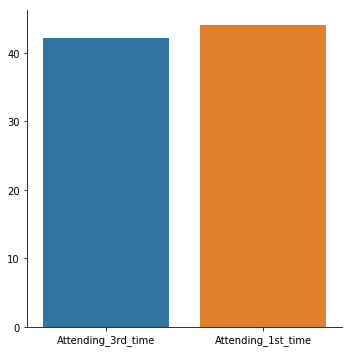

In [17]:
df.to_csv("BikePGHFiltered.csv")
age = []
temp = []
attending_3rd_time = df[df['Attended_Before'] == 2]
attending_3rd_time = attending_3rd_time[attending_3rd_time['Income'] > 80000]
temp.append(attending_3rd_time['Age'].mean())
attending_1st_time = df[df['Attended_Before'] == 0]
attending_1st_time = attending_1st_time[attending_1st_time['Income'] > 80000]
temp.append(attending_1st_time['Age'].mean())
age.append(temp)
name = ['Attending_3rd_time','Attending_1st_time']
data = pd.DataFrame(age, columns = name)
print("Interpretation of average age with income > $80,000: ")
print("Average age of people attending 3rd time : ", attending_3rd_time['Age'].mean())
print("Average age of people attending 1st time : ", attending_1st_time['Age'].mean())
sns.catplot(kind="bar", data=data)
print("Insight : No major age difference between the two groups")

Insight on State

In [18]:
plot_insight('State')
print("Insight: No major difference spotted.")

Insight: No major difference spotted.


Insight on city

In [19]:
plot_insight('City')
print("Insight: The event is attracting people from differenct cities who are willing to attend the event for the first time!")


Insight: The event is attracting people from differenct cities who are willing to attend the event for the first time!


Insight on Gender

In [20]:
plot_insight('Gender')
print("Insight: No major differences spotted")

Insight: No major differences spotted


Insight on Race

In [21]:
plot_insight('Race')
print('Insight: Caucasian, Hispanic and African American are present in both of the groups! While Asians are showing interest to become the part of the event for the first time.')

Insight: Caucasian, Hispanic and African American are present in both of the groups! While Asians are showing interest to become the part of the event for the first time.


Thoughts about whether they want to attend in future

In [22]:
plot_insight('Attend_in_future')
print('Insight: People who are attending for the third time are absolutely loving it! But the people who attended for the first time have mixed reactions. But most of them said they will definitely attend again')

Insight: People who are attending for the third time are absolutely loving it! But the people who attended for the first time have mixed reactions. But most of them said they will definitely attend again


In [23]:
plot_insight('Time_you_will_spend')
print("People who are regular attenders, tend to spend more time")

People who are regular attenders, tend to spend more time


Insight on the Walking tendency

In [24]:
plot_insight('Walking_tendency')
print("Insight: Not much difference!")

Insight: Not much difference!


Insight on the biking tendency

In [25]:
plot_insight('Biking_tendency')
print("Insight: People tend to ride bike more than those who are coming for the first time")

Insight: People tend to ride bike more than those who are coming for the first time


Insight on how much people are willing to spend in the event

Average money people likely to spend who are attending 3rd time :  21.904761904761905
Average money people likely to spend who are attending 1st time :  21.57894736842105
Insight : No major difference between the two groups. Both are equally likely to spend


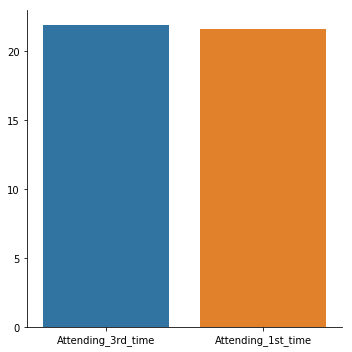

In [26]:
spend = []
temp = []
temp.append(attending_3rd_time['Money_spent_in_OSP'].mean())
temp.append(attending_1st_time['Money_spent_in_OSP'].mean())
spend.append(temp)
name = ['Attending_3rd_time','Attending_1st_time']
data = pd.DataFrame(spend, columns = name)
print("Average money people likely to spend who are attending 3rd time : ", attending_3rd_time['Money_spent_in_OSP'].mean())
print("Average money people likely to spend who are attending 1st time : ", attending_1st_time['Money_spent_in_OSP'].mean())
sns.catplot(kind="bar", data=data)
print("Insight : No major difference between the two groups. Both are equally likely to spend")

In [27]:


# print((attended_3_times['Race'].value_counts()))
# print((attended_2_times['Race'].value_counts()))
# print((attended_3_times['Attend_in_future'].value_counts()))
# print((attended_2_times['Attend_in_future'].value_counts()))
# print((attended_3_times['Money_spent_in_OSP'].mean()))
# print((attended_2_times['Money_spent_in_OSP'].mean()))
# print((attended_3_times['BikePGH_organizes_OSPGH'].value_counts()))
# print((attended_2_times['BikePGH_organizes_OSPGH'].value_counts()))
# print((attended_3_times['Reasons_for_biking'].value_counts()))
# print((attended_2_times['Reasons_for_biking'].value_counts()))

In [28]:
# Filtering out the people who have attended
# ['Best_about_BikePGH', 'Attended_Before', 'How_you_heard',
#        'Primary_activities', 'Time_you_will_spend', 'Walking_tendency',
#        'Biking_tendency', 'Likelihood_walking_exercise',
#        'Likelihood_biking_exercise', 'Do_you_walk', 'Do_you_bike',
#        'Likelihood_walking_transportation', 'Likelihood_biking_transportation',
#        'Reasons_for_biking', 'BikePGH_organizes_OSPGH', 'Children_0-3',
#        'Children_4-8', 'Children_9-13', 'Children_14-17', 'Money_spent_in_OSP',
#        'Attend_in_future', 'Age', 'Race', 'Gender', 'ZipCode', 'Income',
#        'City', 'State', 'Latitude', 'Longitude']